In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import sys

import momepy
import networkx as nx
from libpysal import weights

%matplotlib inline
import matplotlib.pyplot as plt

parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0, parentdir)
import KeyFunctions as kf

root_path = "D:/GeoData/"
Main_CRS = "EPSG:27700"

In [2]:
#Open a small set of geodata to play with
gdf = kf.load_obj(root_path,"raw_gdf_StPauls")

In [3]:
LReg = gdf.loc[gdf["Type"]=="LReg",:].reset_index(drop=True)
LSOA = gdf.loc[gdf["Type"]=="LSOA",:].reset_index(drop=True)

In [4]:
#Add Sales and Average Cost for each LSOA
LSOA["LReg_Sales"] = [np.count_nonzero(LReg.loc[LReg.within(poly_geom),"Details_Float"].to_numpy()) for poly_geom in LSOA.geometry]
LSOA["LReg_AvCost"] = [np.sum(LReg.loc[LReg.within(poly_geom),"Details_Float"].to_numpy()) for poly_geom in LSOA.geometry]/LSOA["LReg_Sales"]

In [14]:
def create_network_from_shapes(shape_gdf):
    centroids = np.column_stack((shape_gdf.centroid.x, shape_gdf.centroid.y))
    queen = weights.Queen.from_dataframe(shape_gdf)
    G = queen.to_networkx()

    keys = [*range(0,G.number_of_nodes())]
    values = shape_gdf["Name"].to_list()
    Node_names = dict(zip(keys, values))

    nx.set_node_attributes(G, Node_names, name="Name")

    positions = dict(zip(G.nodes, centroids))

    return G, positions

In [15]:
def witin_n_boundaries(network, centre_shape, network_size=1):
    G_n = nx.ego_graph(network, 'Name'==centre_shape, network_size)

    in_network = list(dict(G_n.nodes(data="Name")).values())

    return G_n, in_network

In [16]:
def Average_In_Network(shape_gdf, network, centre_shape, count, average, network_size=1):
    Gn, in_network = witin_n_boundaries(network, centre_shape, network_size=network_size)
    new = shape_gdf[shape_gdf['Name'].isin(in_network)].loc[:,[count, average]]
    sales = np.sum(new[count])
    Av_Cost = np.sum(new[count] * new[average])/ sales
    return [sales, Av_Cost]


In [39]:
x = "Hackney 023G"

network, pos = create_network_from_shapes(LSOA)

network.nodes("Name")==x

#G_n = nx.ego_graph(network, 'Name'=="x", 1)

#network.nodes(data=True)

c:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


False

c:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


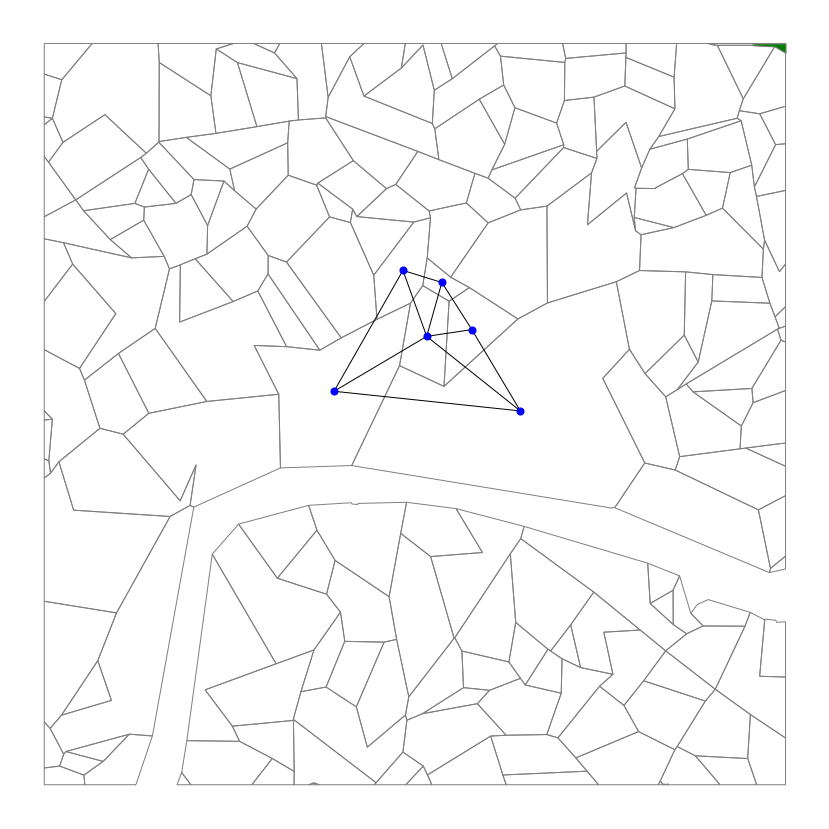

In [20]:
x = "Hackney 023G"

network, pos = create_network_from_shapes(LSOA)

G1, in_G1 = witin_n_boundaries(network, x, network_size=1)

fig, ax = plt.subplots(1, figsize=(15, 15))
plt.axis("off")
LSOA.plot(ax=ax, edgecolor='grey', color='none', linewidth=1)
LSOA.loc[LSOA["Name"]==x,:].plot(ax=ax, edgecolor='grey', color='green', linewidth=1)
nx.draw(G1, pos, ax=ax, node_color="b", node_size=50)

c:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


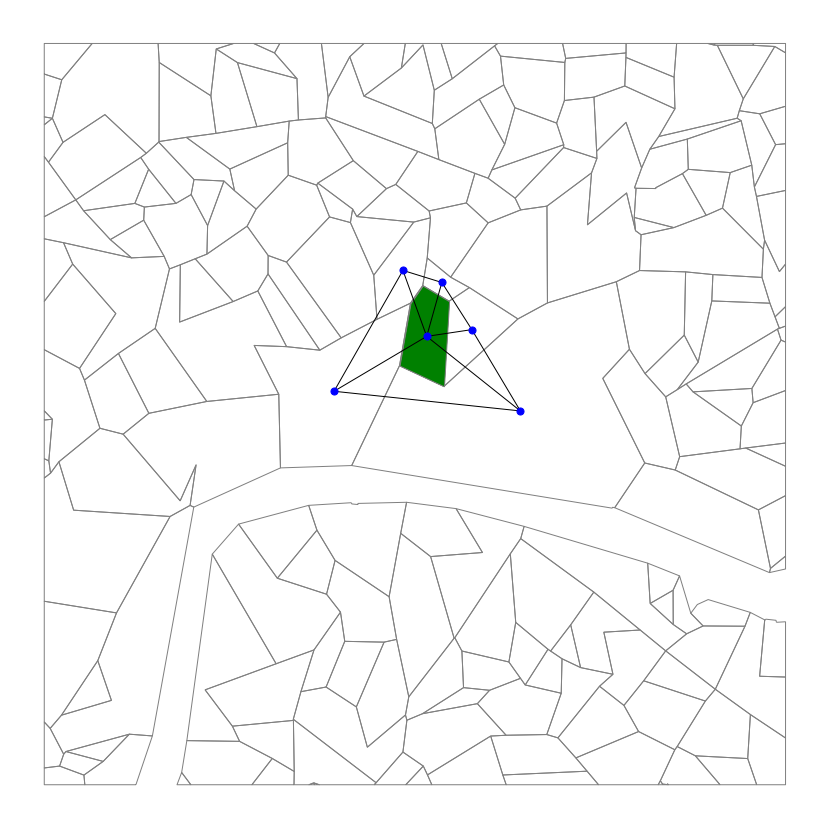

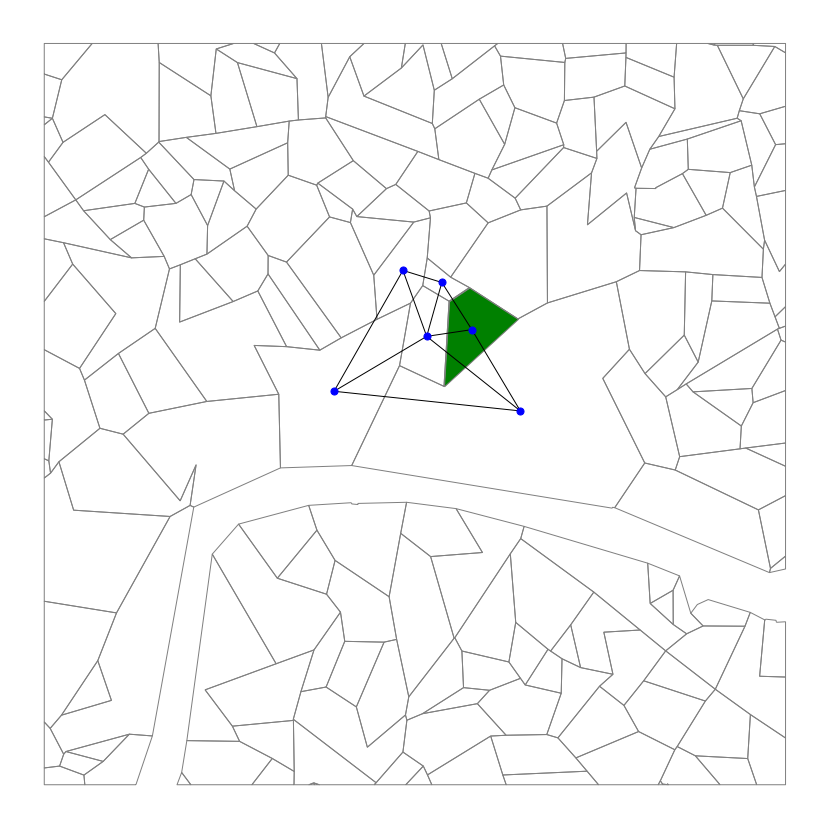

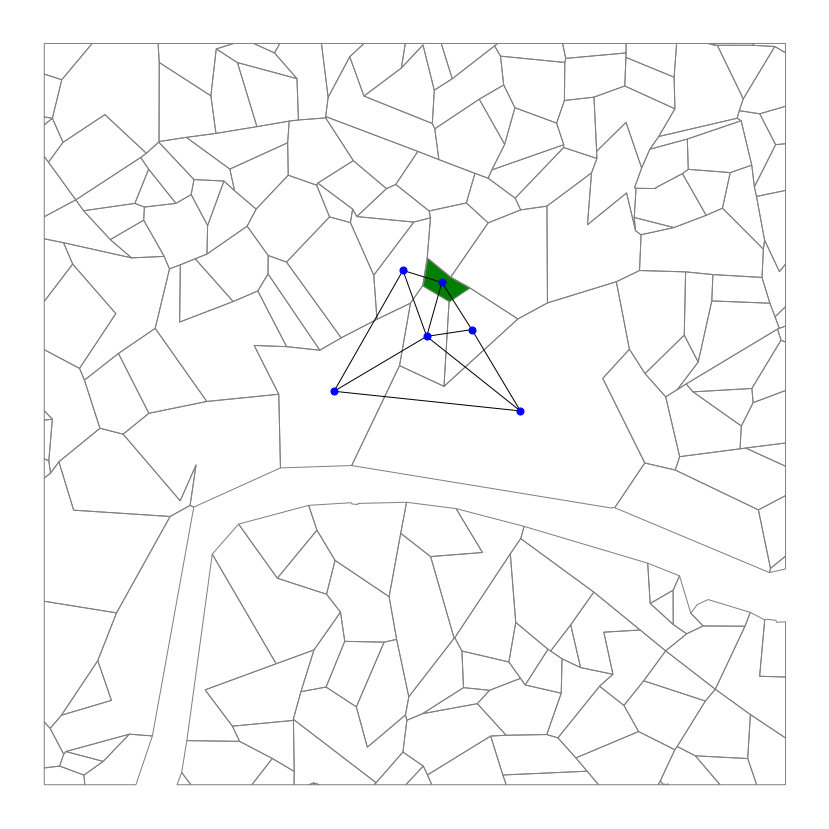

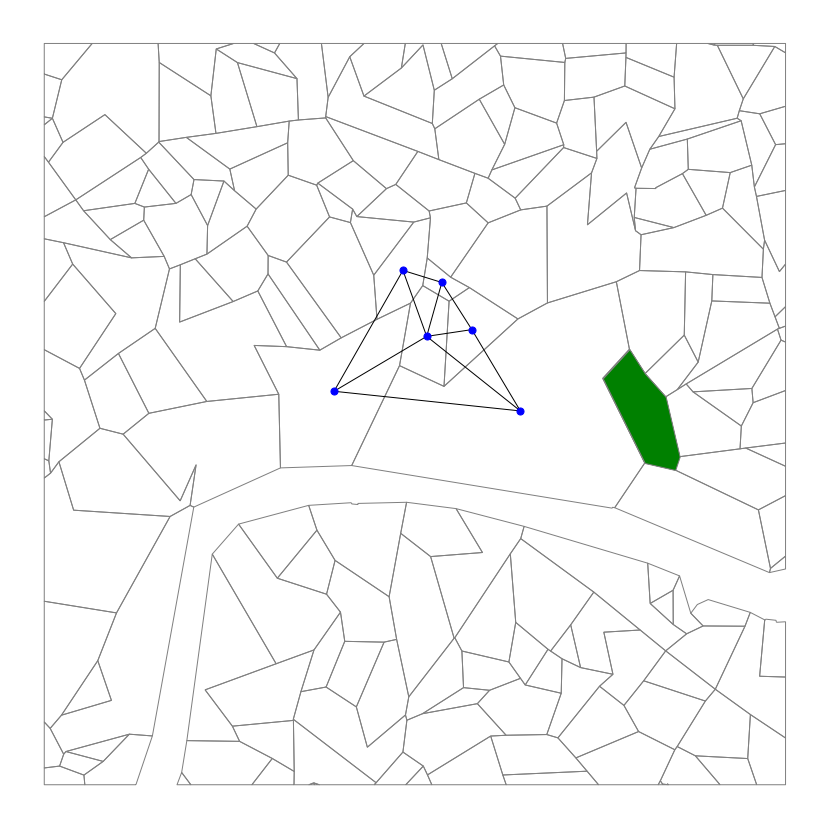

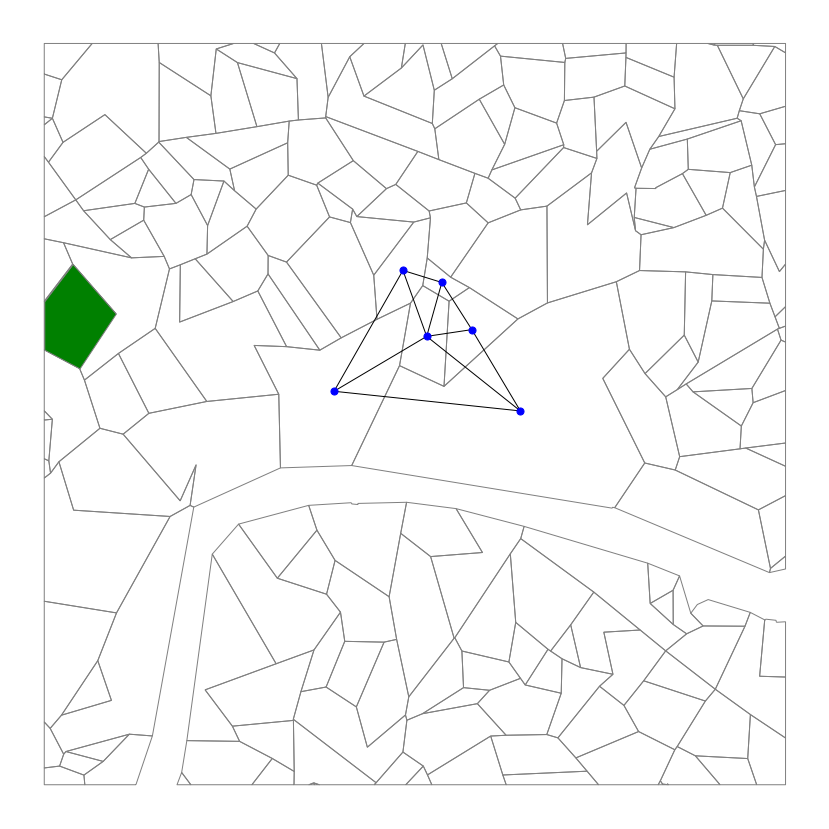

In [18]:
network, pos = create_network_from_shapes(LSOA)

G1, in_G1 = witin_n_boundaries(network, x, network_size=1)

for x in LSOA["Name"][0:5]:
    G1, in_G1 = witin_n_boundaries(network, x, network_size=1)

    fig, ax = plt.subplots(1, figsize=(15, 15))
    plt.axis("off")
    LSOA.plot(ax=ax, edgecolor='grey', color='none', linewidth=1)
    LSOA.loc[LSOA["Name"]==x,:].plot(ax=ax, edgecolor='grey', color='green', linewidth=1)
    nx.draw(G1, pos, ax=ax, node_color="b", node_size=50)

In [19]:
LSOA

,Type,Name,Details_Str,Details_Float,geometry,LReg_Sales,LReg_AvCost
0,LSOA,City of London 001A,NaN,NaN,"POLYGON ((532248.250 181332.036, 531948.314 18...",75,1.020904e+06
1,LSOA,City of London 001B,NaN,NaN,"POLYGON ((532248.250 181332.036, 532282.629 18...",51,1.753362e+06
2,LSOA,City of London 001C,NaN,NaN,"POLYGON ((532419.592 181998.305, 532282.629 18...",15,5.869333e+05
3,LSOA,City of London 001E,NaN,NaN,"POLYGON ((533743.689 181261.328, 533837.939 18...",11,6.669737e+06
4,LSOA,Camden 026A,NaN,NaN,"POLYGON ((529552.000 181579.418, 529552.000 18...",16,2.542989e+06
...,...,...,...,...,...,...,...
178,LSOA,Hackney 027F,NaN,NaN,"POLYGON ((533533.076 182670.995, 533543.662 18...",47,1.540407e+06
179,LSOA,Hackney 027G,NaN,NaN,"POLYGON ((533577.480 182354.766, 533567.188 18...",133,2.821668e+06
180,LSOA,Hackney 027H,NaN,NaN,"POLYGON ((532726.570 183211.594, 533007.796 18...",120,5.963035e+05
181,LSOA,Hackney 027I,NaN,NaN,"POLYGON ((532545.999 182736.000, 532570.999 18...",49,1.288042e+06
